In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [3]:
data = pd.read_csv('/content/Mall_Customers (1).csv')
data.shape

(200, 5)

In [5]:
data.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Gender'].unique()


array([1, 0])

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data,columns=data.columns)


In [11]:
X = scaled_data[['Annual Income (k$)','Spending Score (1-100)']]



In [14]:
cluster1 = KMeans(n_clusters=2,init='k-means++',random_state=42)
cluster1.fit(X)


KMeans(n_clusters=2, random_state=42)

In [16]:
cluster1.inertia_

273.66888662642003

<function matplotlib.pyplot.show(close=None, block=None)>

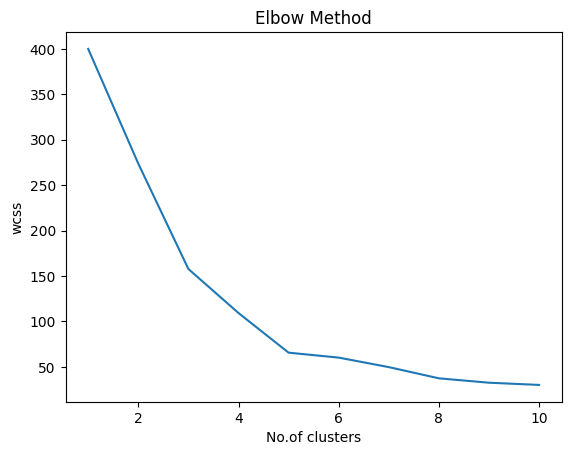

In [17]:
wcss = []
for i in range(1,11):
  idealK = KMeans(n_clusters=i,init='k-means++',random_state=42)
  idealK.fit(X)
  wcss.append(idealK.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No.of clusters')
plt.ylabel('wcss')
plt.show



In [18]:
ideal_cluster = KMeans(n_clusters=5,init='k-means++',random_state=42)
ideal_cluster.fit(X)

KMeans(n_clusters=5, random_state=42)

In [19]:
ideal_cluster.inertia_

65.56840815571681

In [21]:
score = silhouette_score(X,ideal_cluster.labels_)
score

np.float64(0.5546571631111091)

sihouette score with 0.55 suggest that this might have some overlaps

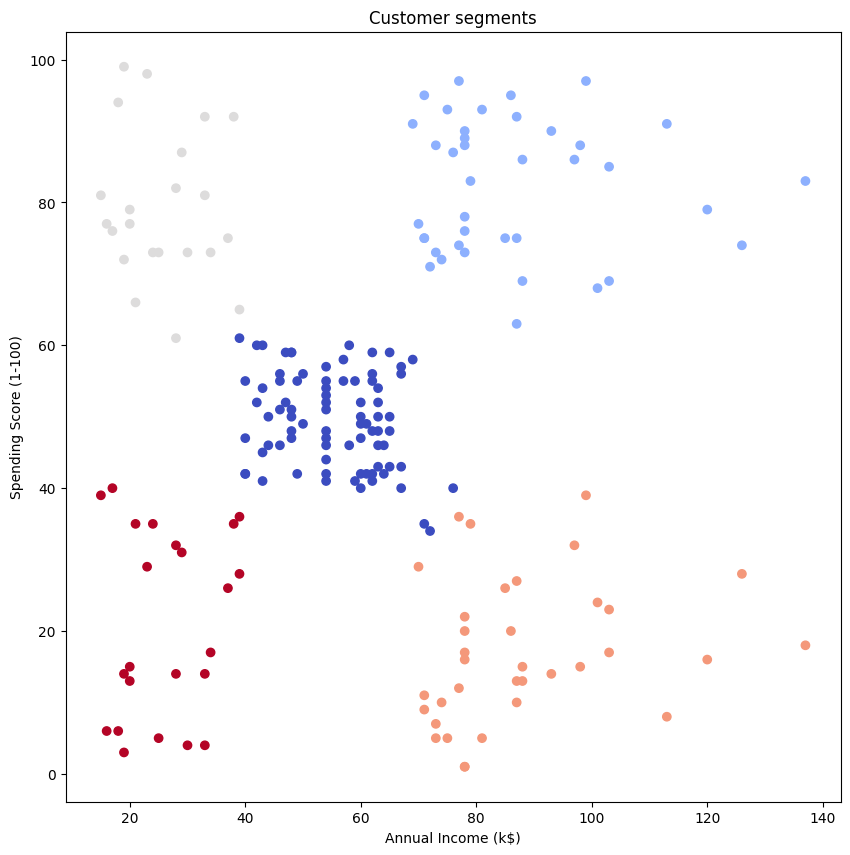

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c =ideal_cluster.labels_, cmap='coolwarm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer segments')
plt.show()